Họ tên: Nguyễn Ngọc Phước

MSSV: 19127519

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [31]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

## Câu 1A

In [32]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1

In [33]:
!./HW2_P1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.879264 ms, post-kernel time = 0.050464 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.962304 ms, post-kernel time = 0.052288 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.979328 ms, post-kernel time = 0.051232 ms
CORRECT :)


Từ kết quả trên, ta có thể thấy rõ kernel time của kernel 1 và 2 khá tương đương nhau, trong khi kernel 3 có sự chênh lệch rõ rệt.
Điều này tuy nhiên là khá lạ, bởi theo slide và theo tính chất thuật toán ta có sự khác biệt giữa 3 kernel như sau:

- Kernel 1: có thể xem như từng thread sẽ xử lý một vị trí cố định trong array, vậy nên theo slide, sẽ dẫn đến trường hợp tất cả các warp đều phân kì do các thread chạy xen kẽ nhau. (0, 2, 4, 8,...)
- Kernel 2: ở mỗi loop, vị trí của phần từ mà từng thread xử lý sẽ có sự thay đổi, khiến cho các thread kề nhau xử lý cùng một câu lệnh, giảm sự phân kì trong quá trình chạy. (phân nửa đầu số thread xử lý một khoảng sẽ chạy, trong khi phần còn lại không)
- Kernel 3: Khá giống với kernel 2 về quản lý sự phân kì ở điểm nửa đầu số thread xử lý một nhóm phần tử sẽ chạy, tuy nhiên lúc này do các phần tử nằm sát nhau, ta tối ưu được hiệu năng truy suất, khiến thời gian chạy nhanh hơn.

Tuy nhiên khi kết quả trả về, ta lại thấy sự chênh lệch rõ rệt, trong khi Kernel 2 phải gần Kernel 3 hơn, tuy nhiên thực tế kernel 2 lại gần kernel 1 hơn. Mặc dù 2 kernel đầu code đúng như trong slide.

## Câu 1B


In [34]:
!./HW2_P1 1024

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.598144 ms, post-kernel time = 0.030048 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 2.662944 ms, post-kernel time = 0.032672 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.265408 ms, post-kernel time = 0.028960 ms
CORRECT :)


In [35]:
!./HW2_P1 512

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.875840 ms, post-kernel time = 0.049792 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.961568 ms, post-kernel time = 0.049856 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.978016 ms, post-kernel time = 0.053152 ms
CORRECT :)


In [36]:
!./HW2_P1 256

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.528896 ms, post-kernel time = 0.089184 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 1.586784 ms, post-kernel time = 0.088160 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 0.840992 ms, post-kernel time = 0.097696 ms
CORRECT :)


In [37]:
!./HW2_P1 128

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 1.325248 ms, post-kernel time = 0.165280 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 1.368928 ms, post-kernel time = 0.172800 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 0.737792 ms, post-kernel time = 0.169792 ms
CORRECT :)


Sau khi tra bảng theo Compute Capability 7.5 thì ta có 3 thông số quan trọng là:
- Maximum number of resident blocks per SM:	`16`
- Maximum number of resident threads per SM:	`1024` 
- Maximum number of resident warps per SM:	`32`, con số này cũng có thể tính bằng cách lấy max threads per sm / 32 = 32


Tính `Grid Size`: Với grid size, ta thấy rằng ở đây, vào lần chạy đầu tiên của for loop, 1 thread sẽ xử lý 2 phần từ. Nên thông số này có thể tính bằng cách lấy: `(n-1)/ (blockSize.x * 2) + 1`

Tính `Numb blocks / SM`: Với thông số trên, ta hoàn toàn có được max thread per SM và max blocks per SM. 
Ta có thể lấy block size chia cho 1024 để đạt được số block sẽ chạy trên 1 SM.

Trong nhiều trường hợp, con số này sẽ vượt quá max block per sm, và ta sẽ phải lấy maximun block per sm làm giá trị. Nhưng do ở đây compute capability là 7.5 thì max là 16, con số khá lớn nên không gặp trường hợp này.

Tính `Occupancy`: Là số warp hiện đang xử dụng trên 1 SM / số warp tối đa trên 1 SM, hay nói cách khác: `(((block Size) / 32) * Num blocks / SM) / 32 * 100`. Với 32 ở cuối công thức là số warp max per sm.

Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 1 | 100 | 2.598144 | 0.030048 | 2.628192
512 | 16385 | 2 | 100 | 1.875840 | 0.049792 | 1.925632
256 | 32769 | 4 | 100 | 1.528896 | 0.089184 | 1.61808
128 | 65537 | 8 | 100 | 1.325248 | 0.165280 | 1.490528

Theo tính chất thuật toán. Số block size chính là chiều dài của array cần tính tổng sau khi thực hiện tính toán trên kernel.

Vậy nên khi block size càng nhỏ: thời gian tính toán trên kernel càng nhỏ, do số lượng phần tử mà từng block xử lý sẽ ít đi, nhưng thời gian tính tổng ở post kernel càng tăng, do số lượng phần từ cần phải tính tổng càng tăng.


## Câu 2

In [38]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

In [42]:
!./HW2_P2 512 1

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 17.838655 ms

CORRECT :)


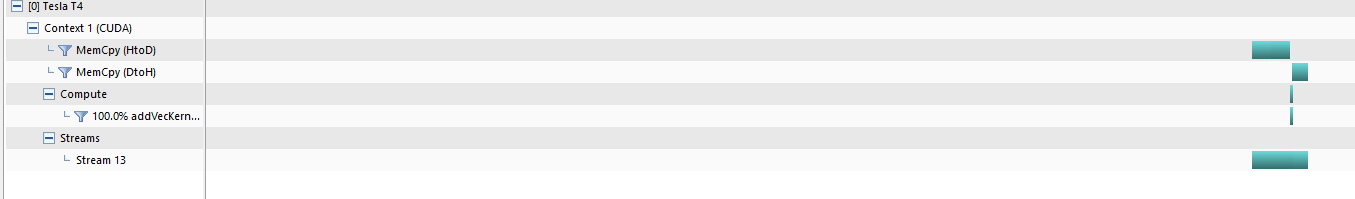

In [41]:
!./HW2_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 14.286624 ms

CORRECT :)


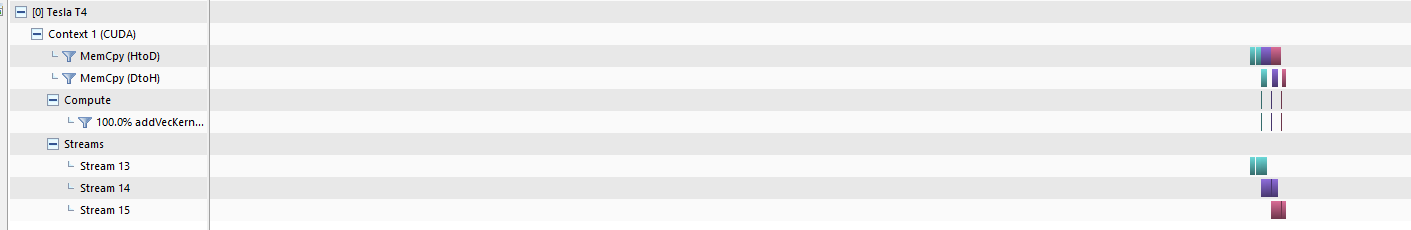